LINK DATASET : https://www.kaggle.com/datasets/mikoajfish99/lions-or-cheetahs-image-classification

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d mikoajfish99/lions-or-cheetahs-image-classification

 80% 57.0M/71.3M [00:00<00:00, 73.7MB/s]
100% 71.3M/71.3M [00:00<00:00, 96.8MB/s]


In [3]:
!unzip lions-or-cheetahs-image-classification.zip -d dataset_directory

Archive:  lions-or-cheetahs-image-classification.zip
  inflating: dataset_directory/images/Cheetahs/0052cb267268c59e.jpg  
  inflating: dataset_directory/images/Cheetahs/00707659aba29334.jpg  
  inflating: dataset_directory/images/Cheetahs/007f9ffc01c7b106.jpg  
  inflating: dataset_directory/images/Cheetahs/00bb45a8568a3474.jpg  
  inflating: dataset_directory/images/Cheetahs/00c8d36882dd6d37.jpg  
  inflating: dataset_directory/images/Cheetahs/00d100b0231b60e6.jpg  
  inflating: dataset_directory/images/Cheetahs/00d9eb862ba3dfc6.jpg  
  inflating: dataset_directory/images/Cheetahs/012f5ecbf49e1da0.jpg  
  inflating: dataset_directory/images/Cheetahs/01750ba1a197e3ad.jpg  
  inflating: dataset_directory/images/Cheetahs/01d688c043bdbfbb.jpg  
  inflating: dataset_directory/images/Cheetahs/0230496e4a8ed917.jpg  
  inflating: dataset_directory/images/Cheetahs/02871f24d5abe59c.jpg  
  inflating: dataset_directory/images/Cheetahs/029b39c0b65ebeb3.jpg  
  inflating: dataset_directory/images

In [4]:
!unzip lions-or-cheetahs-image-classification.zip -d lion_cheetah_data

Archive:  lions-or-cheetahs-image-classification.zip
  inflating: lion_cheetah_data/images/Cheetahs/0052cb267268c59e.jpg  
  inflating: lion_cheetah_data/images/Cheetahs/00707659aba29334.jpg  
  inflating: lion_cheetah_data/images/Cheetahs/007f9ffc01c7b106.jpg  
  inflating: lion_cheetah_data/images/Cheetahs/00bb45a8568a3474.jpg  
  inflating: lion_cheetah_data/images/Cheetahs/00c8d36882dd6d37.jpg  
  inflating: lion_cheetah_data/images/Cheetahs/00d100b0231b60e6.jpg  
  inflating: lion_cheetah_data/images/Cheetahs/00d9eb862ba3dfc6.jpg  
  inflating: lion_cheetah_data/images/Cheetahs/012f5ecbf49e1da0.jpg  
  inflating: lion_cheetah_data/images/Cheetahs/01750ba1a197e3ad.jpg  
  inflating: lion_cheetah_data/images/Cheetahs/01d688c043bdbfbb.jpg  
  inflating: lion_cheetah_data/images/Cheetahs/0230496e4a8ed917.jpg  
  inflating: lion_cheetah_data/images/Cheetahs/02871f24d5abe59c.jpg  
  inflating: lion_cheetah_data/images/Cheetahs/029b39c0b65ebeb3.jpg  
  inflating: lion_cheetah_data/images

In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [43]:
path = '/content/lion_cheetah_data/images'

In [44]:
import os

In [45]:
kategori = os.listdir(path)
kategori

['Cheetahs', 'Lions']

# Mengatur path dataset menjadi 3 train, val, test


In [46]:
train_dir = '/content/lion_cheetah_data/images'  # Ganti dengan path sesuai dengan direktori train
validation_dir = '/content/lion_cheetah_data/images'  # Ganti dengan path sesuai dengan direktori validation
test_dir = '/content/lion_cheetah_data/images'  # Ganti dengan path sesuai dengan direktori test

# Menggunakan ImageDataGenerator untuk memuat serta melakukan augmentasi pada data

In [47]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [48]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Split dataset menjadi train, val, dan test

Data Train

In [49]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.


Data Val

In [50]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.


Data Test

In [51]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.


# Membuat model sequential

In [52]:
model = Sequential()

# Menggunakan pre-trained model VGG16

In [53]:

base_model = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
base_model.trainable = False

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Menggunakan optimizer, loss, dan metrics

In [54]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks

In [55]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

# Latih Model

In [56]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
7/7 [==============================] - 9s 846ms/step - loss: 1.2376 - accuracy: 0.5100 - val_loss: 0.6055 - val_accuracy: 0.6500 - lr: 0.0010
Epoch 2/50
7/7 [==============================] - 4s 669ms/step - loss: 0.7706 - accuracy: 0.5500 - val_loss: 0.5244 - val_accuracy: 0.7300 - lr: 0.0010
Epoch 3/50
7/7 [==============================] - 5s 688ms/step - loss: 0.5100 - accuracy: 0.7500 - val_loss: 0.4371 - val_accuracy: 0.8050 - lr: 0.0010
Epoch 4/50
7/7 [==============================] - 5s 736ms/step - loss: 0.4560 - accuracy: 0.7700 - val_loss: 0.4400 - val_accuracy: 0.7900 - lr: 0.0010
Epoch 5/50
7/7 [==============================] - 4s 655ms/step - loss: 0.4511 - accuracy: 0.7900 - val_loss: 0.3393 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 6/50
7/7 [==============================] - 5s 802ms/step - loss: 0.3590 - accuracy: 0.8350 - val_loss: 0.3206 - val_accuracy: 0.8900 - lr: 0.0010
Epoch 7/50
7/7 [==============================] - 4s 649ms/step - loss: 0.3876 - a

# Evaluasi model

In [57]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Akurasi pada data test: {test_accuracy:.2f}')

7/7 [==============================] - 2s 239ms/step - loss: 0.1237 - accuracy: 0.9800
Akurasi pada data test: 0.98


# Membuat grafik pergerakan metrik Accuracy dan Loss terhadap epoch pada Training dan Validation

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Grafik Accuracy

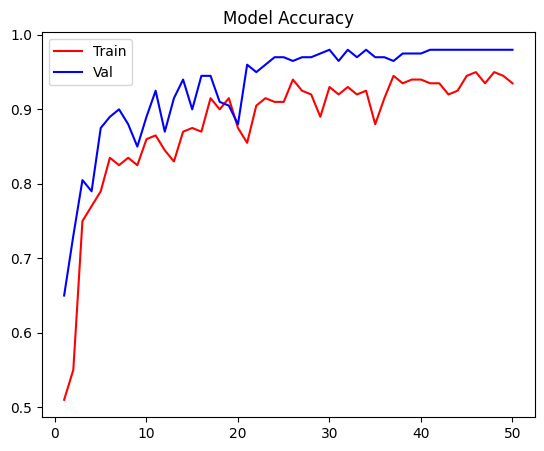

In [78]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Train')
plt.plot(epochs, val_acc, 'b', label='Val')
plt.title('Model Accuracy')
plt.legend()

# Grafik Loss


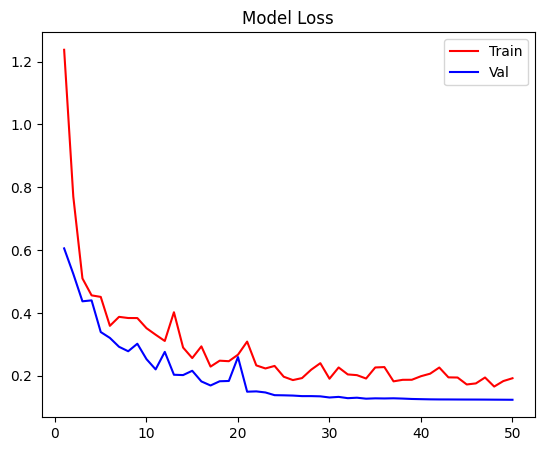

In [79]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Train')
plt.plot(epochs, val_loss, 'b', label='Val')
plt.title('Model Loss')
plt.legend()

plt.show()

In [80]:
# test_x, test_y = validation_generator.__getitem__(2)

# label = train_generator.class_indices
# label = dict((v, k) for k, v in label.items())

# # Buat prediksi
# preds = model.predict(test_x)

# # Tampilkan gambar
# plt.figure(figsize=(16, 16))
# for i in range(16):
#     plt.subplot(4, 4, i + 1)
#     plt.title('Prediksi:%s / Aktual:%s' % (label[int(round(preds[i][0]))], label[int(test_y[i])]))
#     plt.imshow(test_x[i])
